In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [44]:
train_df = pd.read_csv('./inputs/train.csv')
test_df = pd.read_csv('./inputs/Realtimedatabasetest.csv')

In [45]:
train_df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
76688,cd624c6112976613,"As I have declared earlier, I have no interest...",0,0,0,0,0,0
30328,50843e0ffc5bfe37,This is a consequence of the fact that the art...,0,0,0,0,0,0
146427,2bf678447938f07f,"""\n\nWarning: Editing Aguri (caste) - Gross vi...",0,0,0,0,0,0
38885,67c342f9ff8c9e3a,Reverting a link with spam is a double standar...,1,0,0,0,0,0
152372,8c478b1db65f720e,"""\n\nNASTRO\nHelo Headbomb, I am somewhat conc...",0,0,0,0,0,0


In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [47]:
cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']

In [48]:
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# check for any 'null' comment
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)

0

In [50]:
test_df.head()

,id,name,comment_text
0,5988,Devika Anil,hello
1,8517,Devika Anil,IMAGE
2,9563,Devika Anil,you are a faggot
3,307,Devika Anil,I'm going to kill you in your sleep
4,6712,Devika Anil,Fuck you


In [51]:
no_comment = test_df[test_df['comment_text'].isnull()]
no_comment

,id,name,comment_text


In [52]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 12
Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


In [53]:
# Let's look at the character length for the rows in the training data and record these
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))

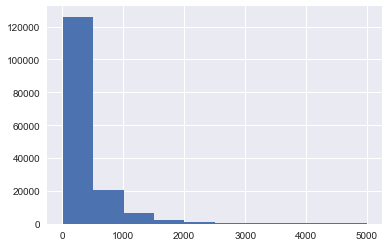

In [54]:
# look at the histogram plot for text length
sns.set()
train_df['char_length'].hist()
plt.show()

In [55]:
data = train_df[cols_target]

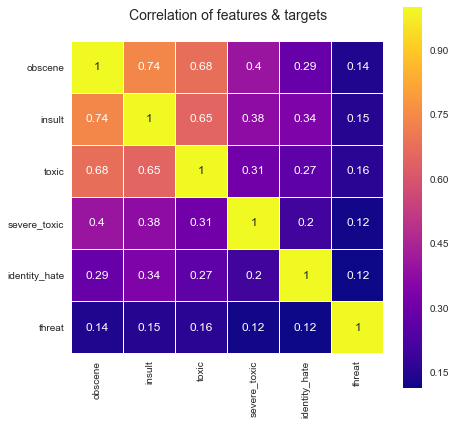

In [56]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [57]:
test_df['char_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))

In [59]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [60]:
# clean the comment_text in train_df
cleaned_train_comment = []
for i in range(0,len(train_df)):
    cleaned_comment = clean_text(train_df['comment_text'][i])
    cleaned_train_comment.append(cleaned_comment)
train_df['comment_text'] = pd.Series(cleaned_train_comment).astype(str)

In [18]:
# clean the comment_text in test_df
cleaned_test_comment = []
for i in range(0,len(test_df)):
    cleaned_comment = clean_text(test_df['comment_text'][i])
    cleaned_test_comment.append(cleaned_comment)
test_df['comment_text'] = pd.Series(cleaned_test_comment).astype(str)

In [19]:
train_df = train_df.drop('char_length',axis=1)

In [20]:
X = train_df.comment_text
test_X = test_df.comment_text

In [21]:
print(X.shape, test_X.shape)

(159571,) (153164,)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [23]:
# create a document-term matrix
X_dtm = vect.fit_transform(X)
X_dtm

<159571x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3178792 stored elements in Compressed Sparse Row format>

In [24]:
# transform the test data into a document-term matrix
test_X_dtm = vect.transform(test_X)
test_X_dtm

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2618972 stored elements in Compressed Sparse Row format>

Binary Relevance. This is probably the simplest which treats each label as a separate single classification problems. The key assumption here though, is that there are no correlation among the various labels.

Classifier Chains. In this method, the first classifier is trained on the input X. Then the subsequent classifiers are trained on the input X and all previous classifiers' predictions in the chain. This method attempts to draw the signals from the correlation among preceding target variables.

Binary Relevance using Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)

submission_binary = pd.read_csv('../inputs/sample_submission.csv')

for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    logreg.fit(X_dtm, y)
    
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_binary[label] = test_y_prob

... Processing obscene
Training accuracy is 0.9832300355327722
... Processing insult
Training accuracy is 0.9755469352200588
... Processing toxic
Training accuracy is 0.9639846839337975
... Processing severe_toxic
Training accuracy is 0.9920724943755445
... Processing identity_hate
Training accuracy is 0.9939713356436947
... Processing threat
Training accuracy is 0.9981199591404453


Creation of the submission file

In [27]:
submission_binary.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.999956,0.463380,0.999965,0.050203,0.971122,0.431323
1,0000247867823ef7,0.002395,0.000431,0.000401,0.000329,0.003284,0.000396
2,00013b17ad220c46,0.011101,0.000119,0.003185,0.000035,0.007277,0.001253
3,00017563c3f7919a,0.001327,0.002130,0.000965,0.000117,0.000872,0.000033
4,00017695ad8997eb,0.019301,0.000834,0.001252,0.000607,0.003282,0.000567


In [28]:
# generate submission file
submission_binary.to_csv('../inputs/submission_binary.csv',index=False)